# Importing Required Libraries

In [88]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

# Importing Dataset

In [34]:
data = pd.read_csv("BigmartSales.csv")
data.head(n=6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_Cat
0,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648,HIGH
1,FDQ19,NaN,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600,HIGH
2,FDZ20,NaN,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020,HIGH
3,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896,HIGH
4,FDI50,NaN,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840,HIGH
5,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490,HIGH


In [35]:
data.shape

(8523, 13)

## Q1. Renaming Variables

In [51]:
data = data.rename(columns = {"Item_Identifier": "Product_ID", 
                       "Item_Weight": "Weight", 
                       "Item_Fat_Content": "Fat"})
data.iloc[:6,:3]

,Product_ID,Weight,Fat
0,NCE42,NaN,Low Fat
1,FDQ19,NaN,Regular
2,FDZ20,NaN,Low Fat
3,FDP33,NaN,Low Fat
4,FDI50,NaN,Regular
5,FDF39,14.85,Regular


## Q2. Typecasting

In [53]:
data.dtypes

Product_ID                    object
Weight                       float64
Fat                           object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Outlet_Sales_Cat         object
dtype: object

## Q3. Scaling and 1-Hot Encoding

##    Q 4. Missing Values

In [81]:
# making new data frame with dropped NA values 
new_data = data.dropna(axis = 0, how ='any') 
  
# comparing sizes of data frames 
print("Old data frame length:", len(data), "\nNew data frame length:",  
       len(new_data), "\nNumber of rows with at least 1 NA value: ", 
       (len(data)-len(new_data)))

Old data frame length: 8523 
New data frame length: 4650 
Number of rows with at least 1 NA value:  3873


## Q5. Descriptive Summary

In [83]:
data.describe()

,Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Q6. Vizz

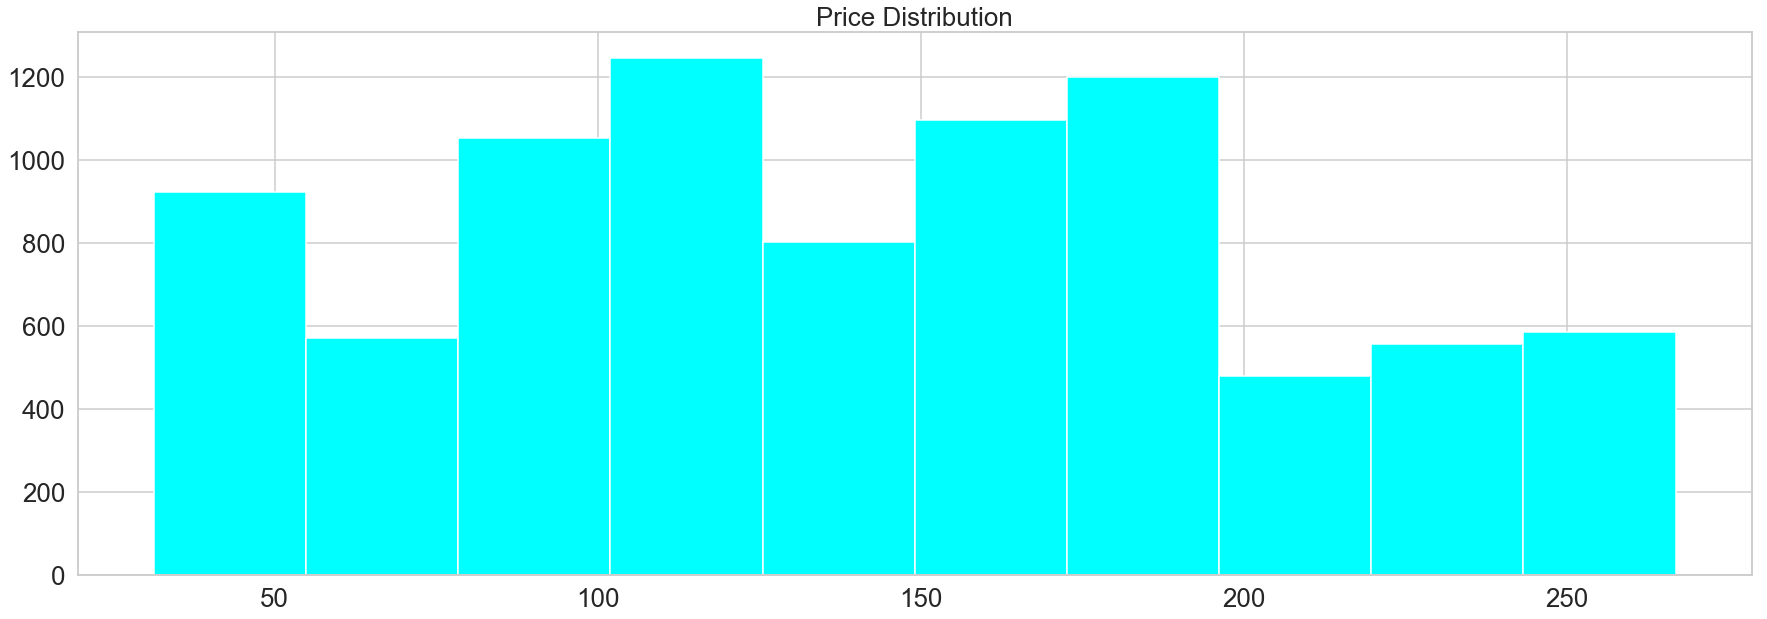

In [99]:
data.Item_MRP.hist(color='cyan')
plt.title('Price Distribution')
plt.show()

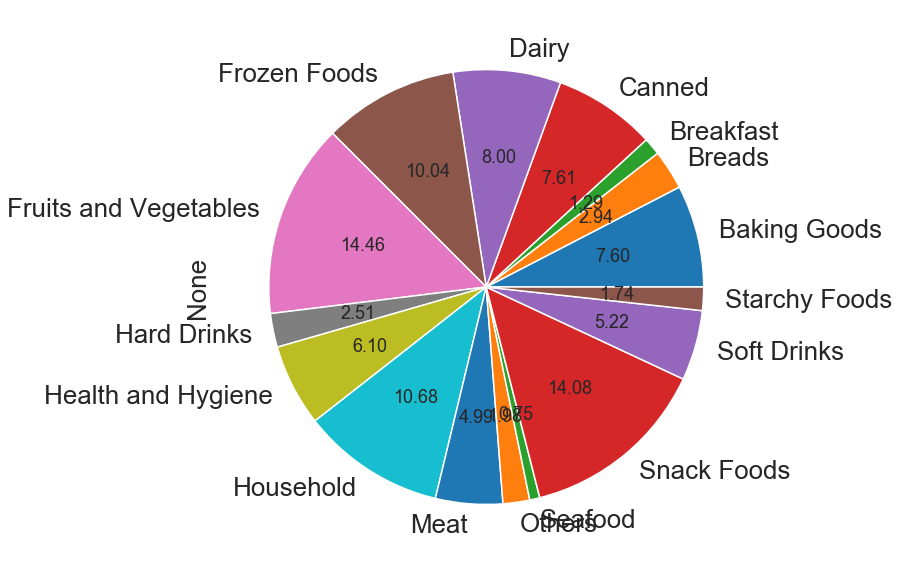

In [97]:
class_series = data.groupby('Item_Type').size()
class_series.plot.pie(autopct='%.2f')
plt.show()

## Q 7. Model Building